In [1]:
import pandas as pd
import psycopg2


In [2]:
conn = psycopg2.connect(database="builditgreen")

In [3]:
import pandas.io.sql as pdsql

In [5]:
projects_df = pdsql.read_frame("SELECT * FROM %s;" % 'api_project', conn)

/Users/joshuahiggins/tiyd/builditgreen/.direnv/python-3.4.3/lib/python3.4/site-packages/pandas/io/sql.py:1630: FutureWarning: read_frame is deprecated, use read_sql
  warnings.warn("read_frame is deprecated, use read_sql", FutureWarning)


In [12]:
projects_df=projects_df.rename(columns = {'id':'project_id'})

In [13]:
projects_df.head()

,project_id,is_confidential,name,street,city,zip_code,country,leed_version,points_achieved,certification_level,certification_date,owner_types,gross_square_foot,total_property_area,project_types,registration_date,state_id_id
0,10000000,No,PNC Firstside Center,21 South Putt Corners Road,Pittsburgh,15219,US,LEED-NC 2.0,33,Silver,2000-10-01,Profit Org.,647000,202923,Commercial Office,2000-03-31,43
1,10000001,Yes,Confidential,Confidential,Confidential,Confidential,US,LEED-NC 2.0,NaN,,None,Confidential,291000,130637,Commercial Office,2000-06-01,20
2,10000002,No,Bethel Commercial Center,53 W. Jackson,Chicago,60604,US,LEED-NC 2.0,45,Gold,2007-11-05,Non-Profit Org.,22592,27500,Commercial Office,2001-08-01,1
3,10000003,Yes,Confidential,Confidential,Confidential,Confidential,US,LEED-NC 2.1,NaN,,None,Confidential,190000,NaN,,2006-09-19,56
4,10000004,No,The Chicago Center for Green Technology,445 N. Sacramento Avenue,Chicago,60612,US,LEED-NC 1.0 Pilot,38,Platinum,2003-06-17,Local Government,28356,130637,Industrial,2000-06-01,1


In [37]:
scores_2009_df = pdsql.read_frame("SELECT * FROM %s;" % 'api_score2009', conn)

/Users/joshuahiggins/tiyd/builditgreen/.direnv/python-3.4.3/lib/python3.4/site-packages/pandas/io/sql.py:1630: FutureWarning: read_frame is deprecated, use read_sql
  warnings.warn("read_frame is deprecated, use read_sql", FutureWarning)


In [11]:
scores_2009_df['project_id']

0       1000000143
1       1000000174
2       1000000194
3       1000000199
4       1000000222
5       1000000224
6       1000000244
7       1000000262
8       1000000292
9       1000000301
10      1000000322
11      1000000353
12      1000000386
13      1000000387
14      1000000388
15      1000000394
16      1000000422
17      1000000451
18      1000000457
19      1000000477
20      1000000497
21      1000000507
22      1000000517
23      1000000558
24      1000000579
25      1000000651
26      1000000677
27      1000000680
28      1000000707
29      1000000708
           ...    
2471    1000035785
2472    1000035828
2473    1000035960
2474    1000036206
2475    1000036464
2476    1000036689
2477    1000036763
2478    1000036775
2479    1000036901
2480    1000037001
2481    1000037022
2482    1000037031
2483    1000037095
2484    1000037306
2485    1000037316
2486    1000037537
2487    1000037617
2488    1000037911
2489    1000037921
2490    1000037954
2491    1000038189
2492    1000

In [14]:
merged_df_2009 = pd.merge(scores_2009_df,projects_df,on='project_id')

In [15]:
merged_df_2009.shape

(2501, 122)

In [18]:
merged_df_2009.head()

,id,ssc1,ssc2,ssc3,ssc4_1,ssc4_2,ssc4_3,ssc4_4,ssc5_1,ssc5_2,...,leed_version,points_achieved,certification_level,certification_date,owner_types,gross_square_foot,total_property_area,project_types,registration_date,state_id_id
0,1,1,5,0,6,0,0,2,0,1,...,LEED-NC v2009,44,Certified,2013-09-20,Government Use: State,86580,53863,Health Care: Outpatient,2009-05-07,12
1,2,0,0,0,6,1,0,0,0,1,...,LEED-NC v2009,65,Gold,2010-12-02,"Educational: University, Private",11806,66000,Core Learning Space: College/University,2009-05-10,20
2,3,1,5,0,0,1,3,2,0,0,...,LEED-NC v2009,44,Certified,2011-08-23,Corporate: Privately Held,3472,10905,Commercial Office,2009-05-12,41
3,4,1,0,0,0,1,3,0,0,1,...,LEED-NC v2009,51,Silver,2012-03-26,"Government Use: Local, City",48732,555823,Public Order and Safety: Other Public Order,2009-05-13,15
4,5,1,5,0,6,1,3,2,0,0,...,LEED-NC v2009,70,Gold,2014-01-17,"Educational: University, Public",212777,108563,Core Learning Space: College/University,2009-05-14,15


In [44]:
columns_list = list(merged_df_2009)

In [45]:
columns_list = [column for column in columns_list if 'possible' not in column]

In [46]:
columns_list.remove('id')

In [47]:
columns_list.remove('state_id_id')

In [48]:
columns_list

['ssc1',
 'ssc2',
 'ssc3',
 'ssc4_1',
 'ssc4_2',
 'ssc4_3',
 'ssc4_4',
 'ssc5_1',
 'ssc5_2',
 'ssc6_1',
 'ssc6_2',
 'ssc7_1',
 'ssc7_2',
 'ssc8',
 'wec1',
 'wec2',
 'wec3',
 'eac1',
 'eac2',
 'eac3',
 'eac4',
 'eac5',
 'eac6',
 'mrc1_1',
 'mrc1_2',
 'mrc2',
 'mrc3',
 'mrc4',
 'mrc5',
 'mrc6',
 'mrc7',
 'eqc1',
 'eqc2',
 'eqc3_1',
 'eqc3_2',
 'eqc4_1',
 'eqc4_2',
 'eqc4_3',
 'eqc4_4',
 'eqc5',
 'eqc6_1',
 'eqc6_2',
 'eqc7_1',
 'eqc7_2',
 'eqc8_1',
 'eqc8_2',
 'idc1',
 'idc2',
 'extra1',
 'extra2',
 'extra3',
 'extra4',
 'project_id',
 'is_confidential',
 'name',
 'street',
 'city',
 'zip_code',
 'country',
 'leed_version',
 'points_achieved',
 'certification_level',
 'certification_date',
 'owner_types',
 'gross_square_foot',
 'total_property_area',
 'project_types',
 'registration_date']

In [29]:
merged_df_2009_small=merged_df_2009[columns_list]

In [57]:
merged_df_2009_small=merged_df_2009_small.set_index('project_id')

In [70]:
merged_df_2009_small.to_pickle("2009_full_score_projects_final.pkl")

In [ ]:
scores_2_2_df = pdsql.read_frame("SELECT * FROM %s;" % 'api_scoretwopointtwo', conn)

In [39]:
scores_2_2_df.shape

(3974, 112)

In [40]:
merged_df_2_2 = pd.merge(scores_2_2_df,projects_df,on='project_id')

In [41]:
merged_df_2_2.shape

(3974, 128)

In [49]:
columns_list_2_2 = list(merged_df_2_2)

In [50]:
columns_list_2_2

['id',
 'ssc1',
 'ssc2',
 'ssc3',
 'ssc4_1',
 'ssc4_2',
 'ssc4_3',
 'ssc4_4',
 'ssc5_1',
 'ssc5_2',
 'ssc6_1',
 'ssc6_2',
 'ssc7_1',
 'ssc7_2',
 'ssc8',
 'wec1_1',
 'wec1_2',
 'wec2',
 'wec3_1',
 'wec3_2',
 'eac1',
 'eac2',
 'eac3',
 'eac4',
 'eac5',
 'eac6',
 'mrc1_1',
 'mrc1_2',
 'mrc1_3',
 'mrc2_1',
 'mrc2_2',
 'mrc3_1',
 'mrc3_2',
 'mrc4_1',
 'mrc4_2',
 'mrc5_1',
 'mrc5_2',
 'mrc6',
 'mrc7',
 'eqc1',
 'eqc2',
 'eqc3_1',
 'eqc3_2',
 'eqc4_1',
 'eqc4_2',
 'eqc4_3',
 'eqc4_4',
 'eqc5',
 'eqc6_1',
 'eqc6_2',
 'eqc7_1',
 'eqc7_2',
 'eqc8_1',
 'eqc8_2',
 'idc1',
 'idc2',
 'project_id',
 'eac1_possible',
 'eac2_possible',
 'eac3_possible',
 'eac4_possible',
 'eac5_possible',
 'eac6_possible',
 'eqc1_possible',
 'eqc2_possible',
 'eqc3_1_possible',
 'eqc3_2_possible',
 'eqc4_1_possible',
 'eqc4_2_possible',
 'eqc4_3_possible',
 'eqc4_4_possible',
 'eqc5_possible',
 'eqc6_1_possible',
 'eqc6_2_possible',
 'eqc7_1_possible',
 'eqc7_2_possible',
 'eqc8_1_possible',
 'eqc8_2_possible',
 'idc1_

In [51]:
columns_list_2_2.remove('id')

In [52]:
columns_list_2_2.remove('state_id_id')

In [53]:
columns_list_2_2 = [column for column in columns_list_2_2 if 'possible' not in column]

In [54]:
columns_list_2_2

['ssc1',
 'ssc2',
 'ssc3',
 'ssc4_1',
 'ssc4_2',
 'ssc4_3',
 'ssc4_4',
 'ssc5_1',
 'ssc5_2',
 'ssc6_1',
 'ssc6_2',
 'ssc7_1',
 'ssc7_2',
 'ssc8',
 'wec1_1',
 'wec1_2',
 'wec2',
 'wec3_1',
 'wec3_2',
 'eac1',
 'eac2',
 'eac3',
 'eac4',
 'eac5',
 'eac6',
 'mrc1_1',
 'mrc1_2',
 'mrc1_3',
 'mrc2_1',
 'mrc2_2',
 'mrc3_1',
 'mrc3_2',
 'mrc4_1',
 'mrc4_2',
 'mrc5_1',
 'mrc5_2',
 'mrc6',
 'mrc7',
 'eqc1',
 'eqc2',
 'eqc3_1',
 'eqc3_2',
 'eqc4_1',
 'eqc4_2',
 'eqc4_3',
 'eqc4_4',
 'eqc5',
 'eqc6_1',
 'eqc6_2',
 'eqc7_1',
 'eqc7_2',
 'eqc8_1',
 'eqc8_2',
 'idc1',
 'idc2',
 'project_id',
 'is_confidential',
 'name',
 'street',
 'city',
 'zip_code',
 'country',
 'leed_version',
 'points_achieved',
 'certification_level',
 'certification_date',
 'owner_types',
 'gross_square_foot',
 'total_property_area',
 'project_types',
 'registration_date']

In [55]:
merged_df_2_2_small = merged_df_2_2[columns_list_2_2]

In [60]:
merged_df_2_2_small = merged_df_2_2_small.set_index("project_id")

In [66]:
merged_df_2_2_small.shape

(3974, 70)

In [67]:
merged_df_2009_small.shape

(2501, 67)

In [69]:
merged_df_2_2_small.to_pickle("2_2_full_score_projects_final.pkl")

In [71]:
merged_df_2_2_small.head()

,ssc1,ssc2,ssc3,ssc4_1,ssc4_2,ssc4_3,ssc4_4,ssc5_1,ssc5_2,ssc6_1,...,country,leed_version,points_achieved,certification_level,certification_date,owner_types,gross_square_foot,total_property_area,project_types,registration_date
project_id,,,,,,,,,,,,,,,,,,,,,
10000385,1,0,0,0,1,1,1,1,1,1,...,US,LEED-NC 2.2,52,Platinum,2010-12-22,Non-Profit Org.,29496,1549749,Interpretive Center,2002-05-13
10000414,1,1,0,1,1,1,0,1,1,0,...,US,LEED-NC 2.2,40,Gold,2010-04-07,State Government,72543,114423,Commercial Office,2002-06-10
10000572,1,0,0,0,1,1,1,0,1,1,...,US,LEED-NC 2.2,40,Gold,2014-06-02,Federal Government,20166,846539,Interpretive Center,2002-11-11
10001269,1,0,0,0,1,0,1,0,0,1,...,US,LEED-NC 2.2,43,Gold,2010-08-26,Non-Profit Org.,6458,1388551,Other,2004-02-17
10001291,1,1,1,1,1,0,1,0,1,1,...,US,LEED-NC 2.2,55,Platinum,2010-08-30,Non-Profit Org.,190131,18175,Laboratory,2004-03-03


In [72]:
merged_df_2009_small["city"].value_counts()

Chicago                   35
Denver                    27
Houston                   23
San Diego                 22
Seattle                   21
Miami                     20
Philadelphia              20
Washington                20
Dallas                    19
San Francisco             19
Gainesville               18
Albuquerque               17
Cincinnati                17
Nashville                 17
Columbus                  16
Portland                  15
Jacksonville              15
Cleveland                 14
Indianapolis              14
Atlanta                   14
Charlottesville           13
Long Beach                13
Tampa                     12
San Antonio               12
Elon                      12
Austin                    12
Boston                    12
Salt Lake City            11
Madison                   11
Lexington                 11
                          ..
Oglesby                    1
Middlebury                 1
Churubusco                 1
Bridgeport    

In [73]:
 merged_df_2_2_small["city"].value_counts()

Chicago                  50
Houston                  46
San Diego                39
Seattle                  39
Portland                 32
Washington               29
Los Angeles              29
Atlanta                  26
Dallas                   25
San Francisco            23
Albuquerque              22
Columbus                 22
Denver                   21
Austin                   21
Fort Carson              21
San Antonio              20
MCB Camp Pendleton       19
Arlington                19
New York                 18
Raleigh                  18
Springfield              18
Baltimore                17
Salt Lake City           17
Orlando                  16
Gainesville              16
Cincinnati               15
Columbia                 15
Rochester                15
Las Vegas                15
Charlotte                15
                         ..
Gates                     1
Aston                     1
Wellman                   1
Staten Island             1
Galveston           

In [82]:
ny_df_2009 = merged_df_2009_small[merged_df_2009_small["city"] == "New York"]

In [83]:
ny_df_2009[['street', 'city', 'zip_code']]

,street,city,zip_code
project_id,,,
1000007248,102 North End Ave,New York,10282
1000011173,1214 5th Avenue,New York,10029
1000013203,325 W 33rd Street,New York,10001
1000013554,424 E. 92nd Street,New York,10128
1000013638,66 East 11th Street,New York,10003
1000014697,345 West 14th Street,New York,10014
1000015506,260 W 26th Street,New York,10001
1000018710,244 Greene Street,New York,10003
1000021152,1824 Madison Avenue,New York,10035


In [84]:
ny_df_2_2 = merged_df_2_2_small[merged_df_2_2_small["city"] == "New York"]

In [86]:
ny_df_2_2[['street', 'city', 'zip_code']]

,street,city,zip_code
project_id,,,
10001291,30 Cooper Square,New York,10003-7120
10013894,511-517 W. 23rd Street,New York,10011
10017960,303 East 33rd Street,New York,10003
10023263,628 West 113th street,New York,10027
10029402,1269 Lexington Avenue,New York,10028
10056262,550 West 120th Street,New York,10027
10063833,205 East 85th street,New York,10028
10087613,550 W 54th Street,New York,10019
10093564,485 Fifth Ave,New York,10017


In [ ]:
df[((df.A==1) == True) | ((df.D==6) == True)]

In [89]:
ny_df_2009_small = merged_df_2009_small[(merged_df_2009_small["city"] == "New York")|(merged_df_2009_small["city"] == "Brooklyn")|(merged_df_2009_small["city"] == "Bronx")|(merged_df_2009_small["city"] == "Staten Island")|(merged_df_2009_small["city"] == "Queens")]

In [96]:
ny_df_2009_small[['street', 'city', 'zip_code', 'certification_date']]

,street,city,zip_code,certification_date
project_id,,,,
1000000517,214-32 Jamaica Ave,Queens,11428,2011-07-08
1000007248,102 North End Ave,New York,10282,2013-02-21
1000008810,45 Clermont Avenue,Brooklyn,11205,2012-06-13
1000011173,1214 5th Avenue,New York,10029,2013-09-13
1000013131,245 East Mosholu Parkway North,Bronx,10467,2014-06-03
1000013203,325 W 33rd Street,New York,10001,2015-03-16
1000013554,424 E. 92nd Street,New York,10128,2014-09-10
1000013638,66 East 11th Street,New York,10003,2015-05-19
1000014697,345 West 14th Street,New York,10014,2014-11-18


In [92]:
ny_df_2_2_small = merged_df_2_2_small[(merged_df_2_2_small["city"] == "New York")|(merged_df_2_2_small["city"] == "Brooklyn")|(merged_df_2_2_small["city"] == "Bronx")|(merged_df_2_2_small["city"] == "Staten Island")|(merged_df_2_2_small["city"] == "Queens")]

In [98]:
ny_df_2_2_small[['street', 'city', 'zip_code', "certification_date", "owner_types"]]

,street,city,zip_code,certification_date,owner_types
project_id,,,,,
10001291,30 Cooper Square,New York,10003-7120,2010-08-30,Non-Profit Org.
10003672,2990 Goulden Avenue,Bronx,10468,2013-07-24,State Government
10011615,1015 Fox Street,Bronx,10459,2012-02-29,Non-Profit Org.
10013894,511-517 W. 23rd Street,New York,10011,2014-01-02,Profit Org.
10017960,303 East 33rd Street,New York,10003,2011-10-25,Profit Org.
10023263,628 West 113th street,New York,10027,2010-12-23,Non-Profit Org.
10029402,1269 Lexington Avenue,New York,10028,2010-12-03,Profit Org.
10031414,550 Food Center Drive,Bronx,10474,2010-06-02,Profit Org.
10031925,970 Richmond Ave.,Staten Island,10314,2014-01-21,Local Government


In [100]:
from sklearn.cluster import KMeans

In [101]:
from sklearn import preprocessing

In [103]:
merged_df_2009_small.columns

Index(['ssc1', 'ssc2', 'ssc3', 'ssc4_1', 'ssc4_2', 'ssc4_3', 'ssc4_4',
       'ssc5_1', 'ssc5_2', 'ssc6_1', 'ssc6_2', 'ssc7_1', 'ssc7_2', 'ssc8',
       'wec1', 'wec2', 'wec3', 'eac1', 'eac2', 'eac3', 'eac4', 'eac5', 'eac6',
       'mrc1_1', 'mrc1_2', 'mrc2', 'mrc3', 'mrc4', 'mrc5', 'mrc6', 'mrc7',
       'eqc1', 'eqc2', 'eqc3_1', 'eqc3_2', 'eqc4_1', 'eqc4_2', 'eqc4_3',
       'eqc4_4', 'eqc5', 'eqc6_1', 'eqc6_2', 'eqc7_1', 'eqc7_2', 'eqc8_1',
       'eqc8_2', 'idc1', 'idc2', 'extra1', 'extra2', 'extra3', 'extra4',
       'is_confidential', 'name', 'street', 'city', 'zip_code', 'country',
       'leed_version', 'points_achieved', 'certification_level',
       'certification_date', 'owner_types', 'gross_square_foot',
       'total_property_area', 'project_types', 'registration_date'],
      dtype='object')

In [110]:
cluster_on_scores = merged_df_2009_small[['ssc1', 'ssc2', 'ssc3', 'ssc4_1', 'ssc4_2', 'ssc4_3', 'ssc4_4',
       'ssc5_1', 'ssc5_2', 'ssc6_1', 'ssc6_2', 'ssc7_1', 'ssc7_2', 'ssc8',
       'wec1', 'wec2', 'wec3', 'eac1', 'eac2', 'eac3', 'eac4', 'eac5', 'eac6',
       'mrc1_1', 'mrc1_2', 'mrc2', 'mrc3', 'mrc4', 'mrc5', 'mrc6', 'mrc7',
       'eqc1', 'eqc2', 'eqc3_1', 'eqc3_2', 'eqc4_1', 'eqc4_2', 'eqc4_3',
       'eqc4_4', 'eqc5', 'eqc6_1', 'eqc6_2', 'eqc7_1', 'eqc7_2', 'eqc8_1',
       'eqc8_2', 'idc1', 'idc2']]

In [238]:
cluster_on_scores.head()

,ssc1,ssc2,ssc3,ssc4_1,ssc4_2,ssc4_3,ssc4_4,ssc5_1,ssc5_2,ssc6_1,...,eqc4_4,eqc5,eqc6_1,eqc6_2,eqc7_1,eqc7_2,eqc8_1,eqc8_2,idc1,idc2
project_id,,,,,,,,,,,,,,,,,,,,,
1000000143,1,5,0,6,0,0,2,0,1,1,...,0,1,0,0,1,1,1,0,1,1
1000000174,0,0,0,6,1,0,0,0,1,0,...,1,1,1,1,1,1,0,1,3,1
1000000194,1,5,0,0,1,3,2,0,0,0,...,0,0,1,0,0,0,0,1,1,1
1000000199,1,0,0,0,1,3,0,0,1,0,...,1,1,1,1,1,0,0,1,2,1
1000000222,1,5,0,6,1,3,2,0,0,0,...,1,1,1,1,1,1,0,0,2,1


In [112]:
clus = preprocessing.scale(cluster_on_scores)

/Users/joshuahiggins/tiyd/builditgreen/.direnv/python-3.4.3/lib/python3.4/site-packages/sklearn/utils/validation.py:498: UserWarning: The scale function assumes floating point values as input, got int64
  "got %s" % (estimator, X.dtype))
/Users/joshuahiggins/tiyd/builditgreen/.direnv/python-3.4.3/lib/python3.4/site-packages/sklearn/preprocessing/data.py:145: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  Xr -= mean_
/Users/joshuahiggins/tiyd/builditgreen/.direnv/python-3.4.3/lib/python3.4/site-packages/sklearn/preprocessing/data.py:153: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/joshuahiggins/tiyd/builditgreen/.direnv/python-3.4.3/lib/python3.4/site-packages/sklearn/preprocessing/

In [115]:
kmeans = KMeans(6)
kmeans.fit(clus)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [116]:
clusters = kmeans.predict(clus)

/Users/joshuahiggins/tiyd/builditgreen/.direnv/python-3.4.3/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:862: RuntimeWarning: Got data type int64, converted to float to avoid overflows
  X = self._check_test_data(X)


In [117]:
clusters

array([5, 5, 5, ..., 5, 5, 2], dtype=int32)

In [122]:
from collections import Counter

In [124]:
Counter(clusters)

Counter({5: 1902, 1: 304, 2: 292, 3: 3})

In [127]:
kmeans5 = KMeans(5)
kmeans5.fit(clus)
clusters5 = kmeans5.predict(clus)

/Users/joshuahiggins/tiyd/builditgreen/.direnv/python-3.4.3/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:862: RuntimeWarning: Got data type int64, converted to float to avoid overflows
  X = self._check_test_data(X)


In [128]:
Counter(clusters5)

Counter({0: 1902, 1: 304, 2: 292, 3: 3})

In [129]:
kmeans4 = KMeans(4)
kmeans4.fit(clus)
clusters4 = kmeans4.predict(clus)

/Users/joshuahiggins/tiyd/builditgreen/.direnv/python-3.4.3/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:862: RuntimeWarning: Got data type int64, converted to float to avoid overflows
  X = self._check_test_data(X)


In [130]:
Counter(clusters4)

Counter({0: 1902, 1: 304, 2: 292, 3: 3})

In [131]:
kmeans3 = KMeans(3)
kmeans3.fit(clus)
clusters3 = kmeans3.predict(clus)

/Users/joshuahiggins/tiyd/builditgreen/.direnv/python-3.4.3/lib/python3.4/site-packages/sklearn/cluster/k_means_.py:862: RuntimeWarning: Got data type int64, converted to float to avoid overflows
  X = self._check_test_data(X)


In [132]:
Counter(clusters3)

Counter({1: 1902, 2: 304, 0: 295})

In [133]:
clusters4

array([0, 0, 0, ..., 0, 0, 2], dtype=int32)

In [134]:
merged_df_2009_small['clusters'] = clusters4

In [135]:
merged_df_2009_small.head()

,ssc1,ssc2,ssc3,ssc4_1,ssc4_2,ssc4_3,ssc4_4,ssc5_1,ssc5_2,ssc6_1,...,leed_version,points_achieved,certification_level,certification_date,owner_types,gross_square_foot,total_property_area,project_types,registration_date,clusters
project_id,,,,,,,,,,,,,,,,,,,,,
1000000143,1,5,0,6,0,0,2,0,1,1,...,LEED-NC v2009,44,Certified,2013-09-20,Government Use: State,86580,53863,Health Care: Outpatient,2009-05-07,0
1000000174,0,0,0,6,1,0,0,0,1,0,...,LEED-NC v2009,65,Gold,2010-12-02,"Educational: University, Private",11806,66000,Core Learning Space: College/University,2009-05-10,0
1000000194,1,5,0,0,1,3,2,0,0,0,...,LEED-NC v2009,44,Certified,2011-08-23,Corporate: Privately Held,3472,10905,Commercial Office,2009-05-12,0
1000000199,1,0,0,0,1,3,0,0,1,0,...,LEED-NC v2009,51,Silver,2012-03-26,"Government Use: Local, City",48732,555823,Public Order and Safety: Other Public Order,2009-05-13,0
1000000222,1,5,0,6,1,3,2,0,0,0,...,LEED-NC v2009,70,Gold,2014-01-17,"Educational: University, Public",212777,108563,Core Learning Space: College/University,2009-05-14,0


In [139]:
cluster_0_2009 = merged_df_2009_small[(merged_df_2009_small['clusters'] == 0)]

In [141]:
cluster_0_2009.describe()

,ssc1,ssc2,ssc3,ssc4_1,ssc4_2,ssc4_3,ssc4_4,ssc5_1,ssc5_2,ssc6_1,...,idc1,idc2,extra1,extra2,extra3,extra4,points_achieved,gross_square_foot,total_property_area,clusters
count,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.00000,1902.000000,1902.000000,1902.000000,...,1902.000000,1902.00000,1879.000000,1814.000000,1651.000000,1324.000000,1902.000000,1902.000000,1902.000000,1902
mean,0.862776,2.936383,0.203470,3.302839,0.653523,2.373817,1.42061,0.168244,0.659832,0.433228,...,2.906414,0.99632,0.475253,0.605292,0.653543,0.575529,55.240273,81821.396951,278547.140904,0
std,0.345699,2.462267,0.402685,2.985461,0.475973,1.219519,0.90748,0.374181,0.474999,0.496712,...,1.533999,0.06057,0.499520,0.488923,0.475985,0.494449,9.033668,149152.255171,666183.707286,0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,33.000000,780.000000,0.000000,0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000,...,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,50.000000,14916.000000,50376.500000,0
50%,1.000000,5.000000,0.000000,6.000000,1.000000,3.000000,2.00000,0.000000,1.000000,0.000000,...,3.000000,1.00000,0.000000,1.000000,1.000000,1.000000,54.000000,34893.000000,113331.500000,0
75%,1.000000,5.000000,0.000000,6.000000,1.000000,3.000000,2.00000,0.000000,1.000000,1.000000,...,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,61.000000,87671.750000,252516.750000,0
max,2.000000,5.000000,1.000000,6.000000,1.000000,3.000000,2.00000,1.000000,2.000000,2.000000,...,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000,95.000000,1810248.000000,11064240.000000,0


In [192]:
cluster_1_2009 = merged_df_2009_small[(merged_df_2009_small['clusters'] == 1)]

In [193]:
cluster_1_2009.describe()

,ssc1,ssc2,ssc3,ssc4_1,ssc4_2,ssc4_3,ssc4_4,ssc5_1,ssc5_2,ssc6_1,...,idc1,idc2,extra1,extra2,extra3,extra4,points_achieved,gross_square_foot,total_property_area,clusters
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,...,304.000000,304.000000,299.000000,298.000000,289.000000,260.000000,304.000000,304.000000,304.000000,304
mean,0.812500,2.763158,0.164474,3.335526,0.595395,2.388158,1.302632,0.203947,0.634868,0.434211,...,3.332237,0.993421,0.842809,0.708054,0.636678,0.546154,69.855263,33069.631579,171121.779605,1
std,0.390956,2.490210,0.371316,2.986093,0.491625,1.210784,0.954679,0.403595,0.482261,0.496470,...,1.441310,0.080977,0.364591,0.455423,0.481791,0.498825,11.337259,55809.940151,272539.217634,0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,1072.000000,0.000000,1
25%,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,62.000000,5204.000000,37672.750000,1
50%,1.000000,5.000000,0.000000,6.000000,1.000000,3.000000,2.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.500000,12503.000000,79306.500000,1
75%,1.000000,5.000000,0.000000,6.000000,1.000000,3.000000,2.000000,0.000000,1.000000,1.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000,37454.250000,174988.000000,1
max,1.000000,5.000000,1.000000,6.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,97.000000,526050.000000,2945372.000000,1


In [144]:
cluster_2_2009 = merged_df_2009_small[(merged_df_2009_small['clusters'] == 2)]

In [145]:
cluster_2_2009.describe()

,ssc1,ssc2,ssc3,ssc4_1,ssc4_2,ssc4_3,ssc4_4,ssc5_1,ssc5_2,ssc6_1,...,idc1,idc2,extra1,extra2,extra3,extra4,points_achieved,gross_square_foot,total_property_area,clusters
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.000000,289.000000,280.000000,246.000000,193.000000,292.000000,292.000000,292.000000,292
mean,0.910959,3.561644,0.215753,4.356164,0.630137,2.445205,1.541096,0.154110,0.613014,0.407534,...,2.904110,0.982877,0.373702,0.592857,0.634146,0.637306,47.664384,76883.174658,187546.880137,2
std,0.285292,2.267271,0.412050,2.680564,0.483596,1.166726,0.842405,0.361674,0.487897,0.492219,...,1.512054,0.129954,0.484625,0.492182,0.482651,0.482028,6.831077,101768.934547,350571.532310,0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1029.000000,4583.000000,2
25%,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,42.000000,17527.000000,41053.750000,2
50%,1.000000,5.000000,0.000000,6.000000,1.000000,3.000000,2.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,48.500000,43221.500000,81093.500000,2
75%,1.000000,5.000000,0.000000,6.000000,1.000000,3.000000,2.000000,0.000000,1.000000,1.000000,...,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52.000000,92289.000000,188986.500000,2
max,1.000000,5.000000,1.000000,6.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,734030.000000,3429154.000000,2


In [146]:
cluster_3_2009 = merged_df_2009_small[(merged_df_2009_small['clusters'] == 3)]

In [148]:
cluster_3_2009.describe()

,ssc1,ssc2,ssc3,ssc4_1,ssc4_2,ssc4_3,ssc4_4,ssc5_1,ssc5_2,ssc6_1,...,idc1,idc2,extra1,extra2,extra3,extra4,points_achieved,gross_square_foot,total_property_area,clusters
count,3.000000,3.000000,3,3.000000,3.000000,3,3.000000,3,3.000000,3,...,3.000000,3,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3
mean,0.666667,1.666667,0,2.000000,0.666667,3,1.333333,0,0.333333,0,...,2.666667,1,0.666667,0.666667,0.666667,0.333333,48.333333,5291.666667,35661.666667,3
std,0.577350,2.886751,0,3.464102,0.577350,0,1.154701,0,0.577350,0,...,1.527525,0,0.577350,0.577350,0.577350,0.577350,2.886751,3329.742382,28024.741111,0
min,0.000000,0.000000,0,0.000000,0.000000,3,0.000000,0,0.000000,0,...,1.000000,1,0.000000,0.000000,0.000000,0.000000,45.000000,1464.000000,13746.000000,3
25%,0.500000,0.000000,0,0.000000,0.500000,3,1.000000,0,0.000000,0,...,2.000000,1,0.500000,0.500000,0.500000,0.000000,47.500000,4177.500000,19873.000000,3
50%,1.000000,0.000000,0,0.000000,1.000000,3,2.000000,0,0.000000,0,...,3.000000,1,1.000000,1.000000,1.000000,0.000000,50.000000,6891.000000,26000.000000,3
75%,1.000000,2.500000,0,3.000000,1.000000,3,2.000000,0,0.500000,0,...,3.500000,1,1.000000,1.000000,1.000000,0.500000,50.000000,7205.500000,46619.500000,3
max,1.000000,5.000000,0,6.000000,1.000000,3,2.000000,0,1.000000,0,...,4.000000,1,1.000000,1.000000,1.000000,1.000000,50.000000,7520.000000,67239.000000,3


In [155]:
cluster_0_plot = cluster_0_2009[['gross_square_foot', 'total_property_area']]

In [156]:
cluster_0_plot.head()

,gross_square_foot,total_property_area
project_id,,
1000000143,86580,53863
1000000174,11806,66000
1000000194,3472,10905
1000000199,48732,555823
1000000222,212777,108563


In [157]:
%matplotlib inline

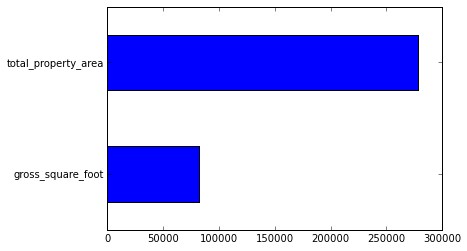

In [159]:
cluster_0_plot.mean().plot(kind = 'barh')

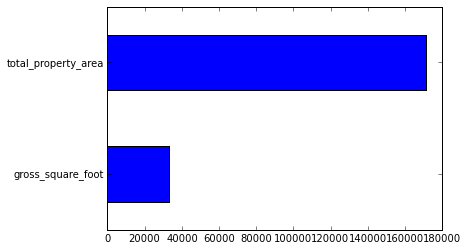

In [160]:
cluster_1_plot = cluster_1_2009[['gross_square_foot', 'total_property_area']]
cluster_1_plot.mean().plot(kind = 'barh')

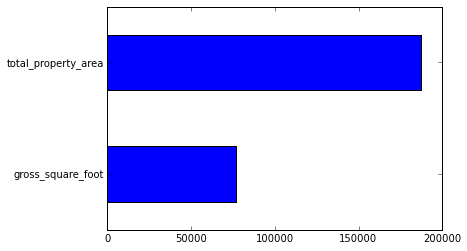

In [161]:
cluster_2_plot = cluster_2_2009[['gross_square_foot', 'total_property_area']]
cluster_2_plot.mean().plot(kind = 'barh')

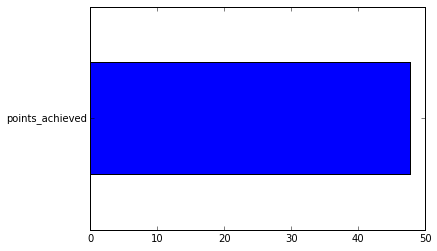

In [162]:
cluster_2_2009[['points_achieved']].mean().plot(kind = 'barh')

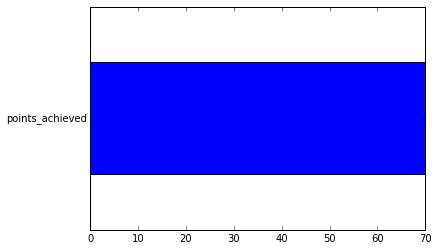

In [163]:
cluster_1_2009[['points_achieved']].mean().plot(kind = 'barh')

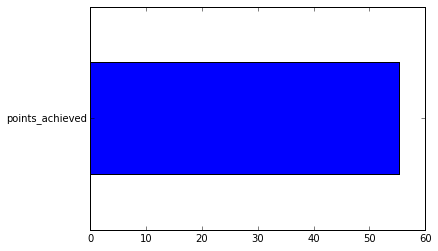

In [164]:
cluster_0_2009[['points_achieved']].mean().plot(kind = 'barh')

In [183]:
cluster_0_2009_mean = cluster_0_2009.mean().to_frame()

In [195]:
cluster_1_2009_mean = cluster_1_2009.mean().to_frame()

In [197]:
cluster_2_2009_mean = cluster_2_2009.mean.to_frame()

In [205]:
cluster_2_2009_mean.columns = ["cluster_2_mean"]

In [206]:
cluster_1_2009_mean.columns = ["cluster_1_mean"]

In [207]:
cluster_0_2009_mean.columns = ["cluster_0_mean"]

In [208]:
cluster_0_and_1 = cluster_0_2009_mean.join(cluster_1_2009_mean)

In [212]:
cluster_0_1_2 = cluster_0_and_1.join(cluster_2_2009_mean)

In [215]:
cluster_0_1_2.tail()

,cluster_0_mean,cluster_1_mean,cluster_2_mean
extra4,0.575529,0.546154,0.637306
points_achieved,55.240273,69.855263,47.664384
gross_square_foot,81821.396951,33069.631579,76883.174658
total_property_area,278547.140904,171121.779605,187546.880137
clusters,0.000000,1.000000,2.000000


In [217]:
cluster_0_1_2.index

Index(['ssc1', 'ssc2', 'ssc3', 'ssc4_1', 'ssc4_2', 'ssc4_3', 'ssc4_4',
       'ssc5_1', 'ssc5_2', 'ssc6_1', 'ssc6_2', 'ssc7_1', 'ssc7_2', 'ssc8',
       'wec1', 'wec2', 'wec3', 'eac1', 'eac2', 'eac3', 'eac4', 'eac5', 'eac6',
       'mrc1_1', 'mrc1_2', 'mrc2', 'mrc3', 'mrc4', 'mrc5', 'mrc6', 'mrc7',
       'eqc1', 'eqc2', 'eqc3_1', 'eqc3_2', 'eqc4_1', 'eqc4_2', 'eqc4_3',
       'eqc4_4', 'eqc5', 'eqc6_1', 'eqc6_2', 'eqc7_1', 'eqc7_2', 'eqc8_1',
       'eqc8_2', 'idc1', 'idc2', 'extra1', 'extra2', 'extra3', 'extra4',
       'points_achieved', 'gross_square_foot', 'total_property_area',
       'clusters'],
      dtype='object')

In [227]:
cluster_score_plot = cluster_0_1_2.iloc[0:-4]

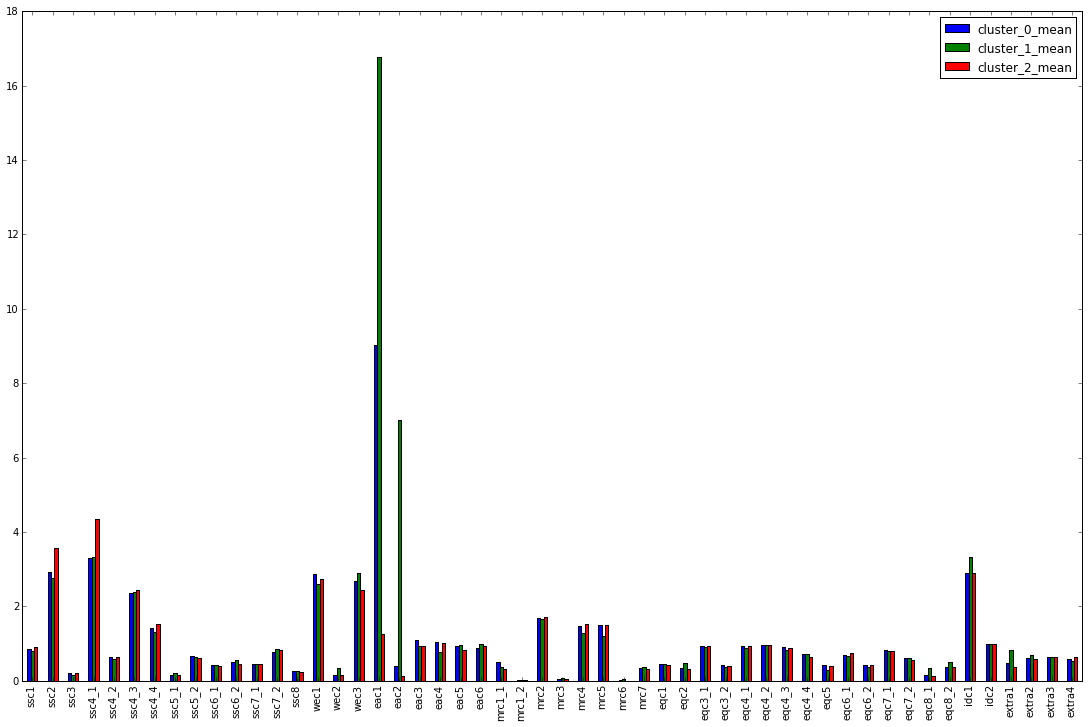

In [228]:
cluster_score_plot.plot(kind="bar", figsize=(19, 12))

In [233]:
cluster_score_plot_points = cluster_0_1_2.iloc[-4]

/Users/joshuahiggins/tiyd/builditgreen/.direnv/python-3.4.3/lib/python3.4/site-packages/pandas/tools/plotting.py:856: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


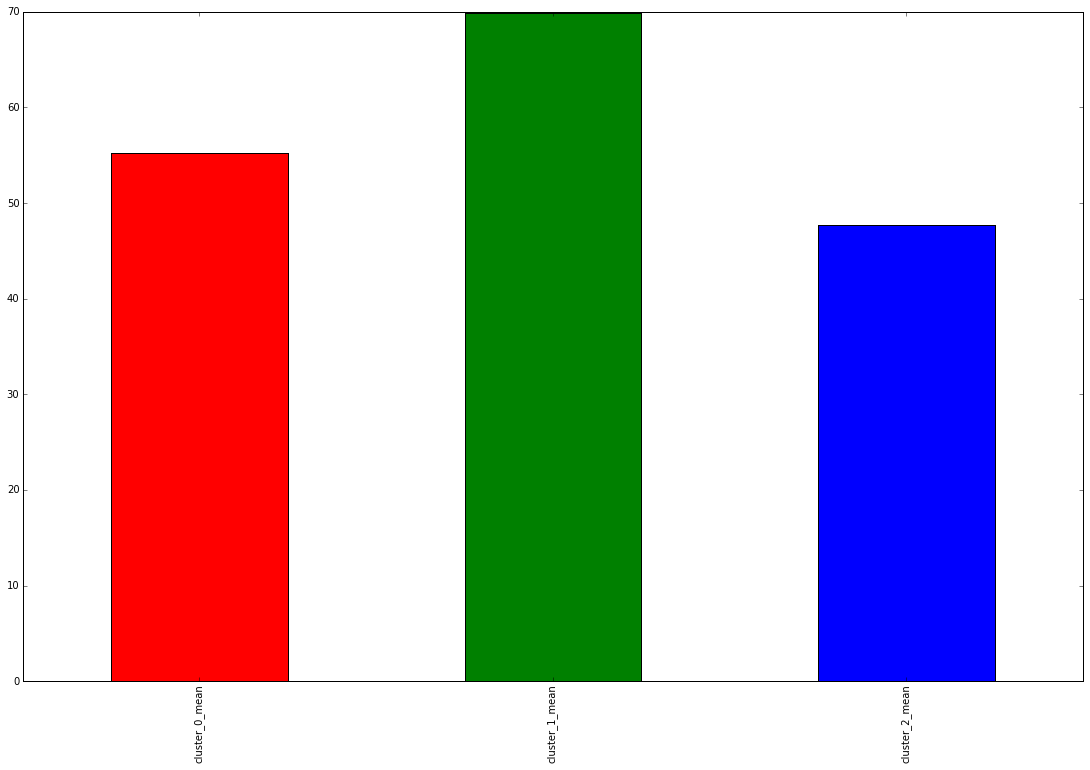

In [251]:
cluster_score_plot_points.plot(kind="bar", figsize=(19,12), colors=("r","g","b"))

In [235]:
cluster_score_plot_size = cluster_0_1_2.iloc[-3:-1]

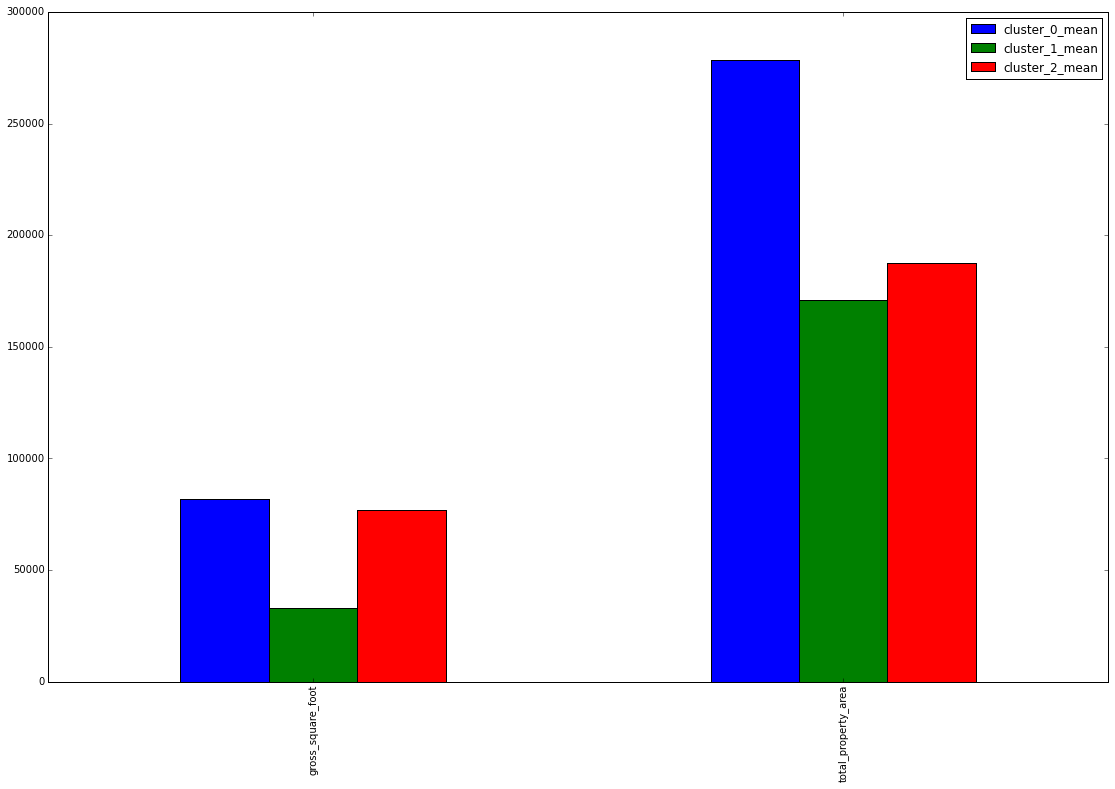

In [237]:
cluster_score_plot_size.plot(kind="bar", figsize=(19,12))

Try a Mean Shift

In [239]:
from sklearn.cluster import MeanShift

In [245]:
ms = MeanShift(.5)

In [246]:
ms.fit(clus)

MeanShift(bandwidth=0.5, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     seeds=None)

In [247]:
ms_clusters = ms.predict(clus)

In [248]:
ms_clusters

array([0, 0, 0, ..., 0, 0, 2])

In [249]:
Counter(ms_clusters)

Counter({0: 1902, 1: 304, 2: 292, 3: 3})

In [250]:
ms_25 = MeanShift(.25)
ms_25.fit(clus)
ms_25_clusters = ms_25.predict(clus)
Counter(ms_25_clusters)

Counter({0: 1902, 1: 304, 2: 292, 3: 3})